In [73]:
# Week of 10/3
#expanding on AMP. plotting BER vs SNR
# compare x with xHt and see if locations of non-zero entries align
from math import sqrt
import random
import numpy as np
import matplotlib.pyplot as plt

# parameters
n = 250
N = 1024
k = 40
trials = 10
iteration = 100
iterations = np.array([10, 50, 100, 200])

# create x vector  CHANGE ME- to how you discussed with Jamison
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
non_zero_entries = np.random.randint(10, size=(k, 1))+1
x[idx_nonzero_entries] = non_zero_entries

# Generate matrix A
# SD * random array of size nxN
A = np.sqrt(1/n)*np.random.randn(n, N)


# create sigmas corresponding to SNR 1-10
sigma = []
for i in range(1,11):
    sigma.append(1 / sqrt((10**(i/10))))    
    

# Prep for AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = np.zeros(x.shape)
ons = 0 
tau = 0

snr = np.arange(1, 11, 1)  #creates array of 1-10

In [74]:
# support functions 
#eta
def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

#onsager - calculated as zero norm
def onsager(z, r, tau):
    # tau is different from s*lambda_
    return (z/n) * np.sum(eta(r, tau) != 0)
 

In [ ]:
avg_ber = np.zeros(trials)  # will hold the avg values to be plotted vs snr
for i in range(10):  #  controls the sigma value (SNR)
    # generate new w and y for each sigma
    w = random.normalvariate(0, sigma[i]/sqrt(2)) + 1j*random.normalvariate(0, sigma[i]/sqrt(2))  # noise vec
    y = A @ x + w 
    ber = 0  # reset BER for next sigma value
    for j in range(trials):  # iterates over multiple trials
        for iter_num in range(iteration):  
            # run AMP
            ons = onsager(z, r, tau) #calulate next onsager
            z = y - A @ xHt + ons
            tau = np.sqrt((1/n)) * np.linalg.norm(z)
            r = xHt + A.T @ z
            xHt = eta(r, tau)
        ber += (1/N) * np.sum((x != 0) ^ (xHt != 0)) 
    print(f'sigma {i} ber = {ber}')
    avg_ber[i] = ber / trials
             
plt.figure()
plt.semilogy(snr, avg_ber)
plt.xlabel('SNR')
plt.ylabel('BER')
plt.grid(True, which='both')
#plt.title("log(BER) vs. SNR")

sigma 0 ber = 2.060546875
sigma 1 ber = 0.29296875
sigma 2 ber = 2.0625


In [51]:
# sum goes index by index comparing x and xHt and adding the errors
x = np.array([0, 1,2,0,2])
xHt = np.array([8,5,2,0,0])
np.sum((x != 0) ^ (xHt != 0))  # ex. this outputs 2

2

In [ ]:
# counting the number of mistakes
# this is an ineffecient way to do this
err_cnt = 0
ber = []
for i in range(N):  # loop throgh all values of x
    if x[i] == 0 and xHt[i] != 0:
        err_cnt += 1
    if x[i] != 0 and xHt[i] == 0:
        err_cnt += 1
    ber.append(err_cnt / (i+1))

'\nplt.figure()\nplt.semilogy(snr, avg_ber)\nplt.xlabel(\'SNR\')\nplt.ylabel(\'BER\')\nplt.grid(True, which=\'both\')\n#plt.title("log(BER) vs. SNR")\n'

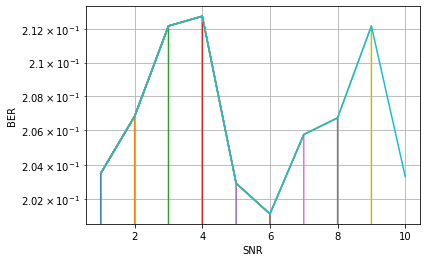

In [61]:
# uncomment iteration and comment out the top for loop to simplify and debug
# fix indentation accordingly
iteration = 50
#for iteration in iterations:
ber = 0
avg_ber = np.zeros(10)
plt.figure()
for i in range(10):  #  controls the sigma value (SNR)
    ber = 0  # reset BER for next sigma value
    w = random.normalvariate(0, sigma[i]/sqrt(2)) + 1j*random.normalvariate(0, sigma[i]/sqrt(2))  # noise vec
    for j in range(trials):  # iterates over multiple trials
        for iter_num in range(iteration):  
            # run AMP
            ons = onsager(z, r, tau) #calulate next onsager
            z = y - A @ xHt + ons
            tau = np.sqrt((1/n)) * np.linalg.norm(z)
            r = xHt + A.T @ z
            xHt = eta(r, tau)
        ber += (1/N) * np.sum((x != 0) ^ (xHt != 0))  #calc BER after all AMP iterations
    avg_ber[i] = ber / trials  # sum of BER divided by number of trials
    plt.semilogy(snr, avg_ber)
    plt.xlabel('SNR')
    plt.ylabel('BER')
    plt.grid(True, which='both')
'''
plt.figure()
plt.semilogy(snr, avg_ber)
plt.xlabel('SNR')
plt.ylabel('BER')
plt.grid(True, which='both')
#plt.title("log(BER) vs. SNR")
'''